### Import Libraries

In [3]:
import math, random
#import torch
#import torchaudio
#from torchaudio import transforms
#from IPython.display import Audio
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from PIL import Image
import seaborn as sns
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv
import sys
import time

In [4]:
import keras
import tensorflow as tf
from tensorflow.image import extract_patches
from tensorflow.keras import layers, Model, regularizers
from keras import models, optimizers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [5]:
import noisereduce as nr
#import torch.nn.functional as F
#from torch.nn import init

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Define Functions

In [37]:
def waveshow(audio_file, offset=None, duration=None):
    sig, sr = torchaudio.load(audio_file)
    samples, sample_rate = librosa.load(audio_file, sr=None, offset = offset, duration=duration)

    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(samples, sr=sample_rate)

def spectogram(audiofile, offset=None, duration=None):
    samples, sample_rate = librosa.load(audiofile, sr=None, offset = offset, duration=duration)
    sgram = librosa.stft(samples)
    sgram_mag, _ = librosa.magphase(sgram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    
def spectro_convert(audiofile, offset=None, duration=None):
    samples, sample_rate = librosa.load(audiofile, sr=None, offset = offset, duration=duration)
    sgram = librosa.stft(samples)
    sgram_mag, _ = librosa.magphase(sgram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    return(mel_sgram)

### Load Dataset

In [39]:
def load_data():
    os.chdir("C:\\Data Science Projects\\Cooker Whistle\\wav_format\\two_sec_window\\Out_0")
    files = glob.glob('*.wav')
    X = []
    y = []
    hop = 256
    for file in files:  
        audio_file = file
        mel_sgram = spectro_convert(audio_file)
        mel_sgram = np.array(mel_sgram)
        img = Image.fromarray(mel_sgram)
        img = img.resize(size=(120, 120))
        img = np.asarray(img)
        X.append(img)
        y.append(0)

    os.chdir("C:\\Data Science Projects\\Cooker Whistle\\wav_format\\two_sec_window\\Out_1")
    files = glob.glob('*.wav')
    for file in files:  
        audio_file = file
        mel_sgram = spectro_convert(audio_file)
        mel_sgram = np.array(mel_sgram)
        img = Image.fromarray(mel_sgram)
        img = img.resize(size=(120, 120))
        img = np.asarray(img)
        X.append(img)
        y.append(1)

    return(np.array(X), np.array(y))

### Visualize Spectograms

In [9]:
audio_file = "C:\\Data Science Projects\\Cooker Whistle\\wav_format\\cooker whistle 7.wav"

In [23]:
files = glob.glob("C:\\Data Science Projects\\Cooker Whistle\\wav_format\\two_sec_window\\Out_0\\*.wav")
files

['C:\\Data Science Projects\\Cooker Whistle\\wav_format\\two_sec_window\\Out_0\\11_5.wav',
 'C:\\Data Science Projects\\Cooker Whistle\\wav_format\\two_sec_window\\Out_0\\11_6.wav',
 'C:\\Data Science Projects\\Cooker Whistle\\wav_format\\two_sec_window\\Out_0\\12_4.wav',
 'C:\\Data Science Projects\\Cooker Whistle\\wav_format\\two_sec_window\\Out_0\\12_5.wav',
 'C:\\Data Science Projects\\Cooker Whistle\\wav_format\\two_sec_window\\Out_0\\12_6.wav',
 'C:\\Data Science Projects\\Cooker Whistle\\wav_format\\two_sec_window\\Out_0\\13_5.wav',
 'C:\\Data Science Projects\\Cooker Whistle\\wav_format\\two_sec_window\\Out_0\\13_6.wav',
 'C:\\Data Science Projects\\Cooker Whistle\\wav_format\\two_sec_window\\Out_0\\14_0.wav',
 'C:\\Data Science Projects\\Cooker Whistle\\wav_format\\two_sec_window\\Out_0\\14_6.wav',
 'C:\\Data Science Projects\\Cooker Whistle\\wav_format\\two_sec_window\\Out_0\\14_7.wav',
 'C:\\Data Science Projects\\Cooker Whistle\\wav_format\\two_sec_window\\Out_0\\14_8.wav',

In [109]:
ind_list = [13, 17, 19, 20, 21, 24, 25, 27, 28, 31, 35, 40, 42, 43, 49, 52, 70]
for ind in ind_list:
    source = files[ind]
    dest = files[ind].replace("Out_0", "Out_1")
    shutil.move(source, dest)

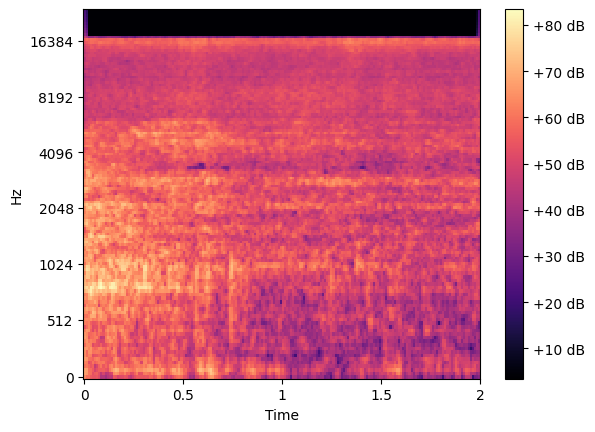

In [105]:
audio_file = files[73] #"C:\\Data Science Projects\\Cooker Whistle\\wav_format\\two_sec_window\\Out_0\\" + 
spectogram(audio_file)

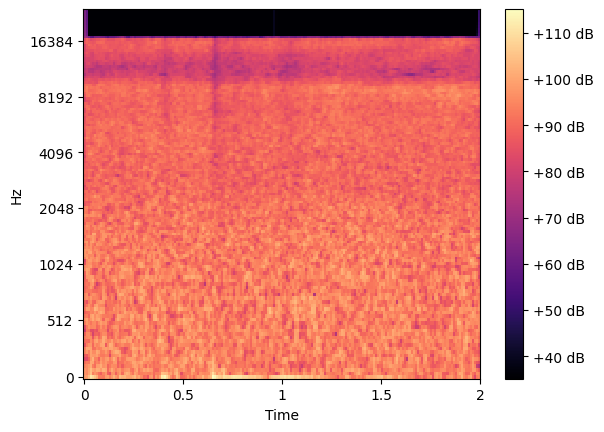

In [11]:
audio_file = "C:\\Data Science Projects\\Cooker Whistle\\wav_format\\two_sec_window\\Out_1\\1_4.wav"
spectogram(audio_file)

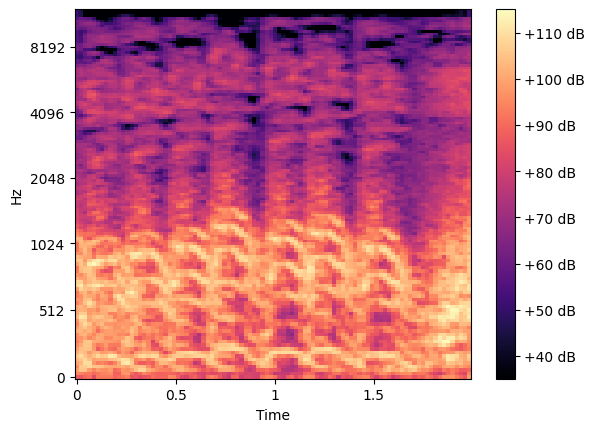

In [119]:
audio_file = "C:\\Data Science Projects\\Cooker Whistle\\wav_format\\Random_two_sec\\R_7_3.wav"
spectogram(audio_file)

In [69]:
audio_file = "C:\\Data Science Projects\\Cooker Whistle\\wav_format\\7.wav"
samples, sample_rate = librosa.load(audio_file, sr=None)
reduced_noise = nr.reduce_noise(audio_clip=samples, noise_clip=samples, verbose=False)
waveshow(reduced_noise)

TypeError: reduce_noise() got an unexpected keyword argument 'audio_clip'

### Visualize Audio

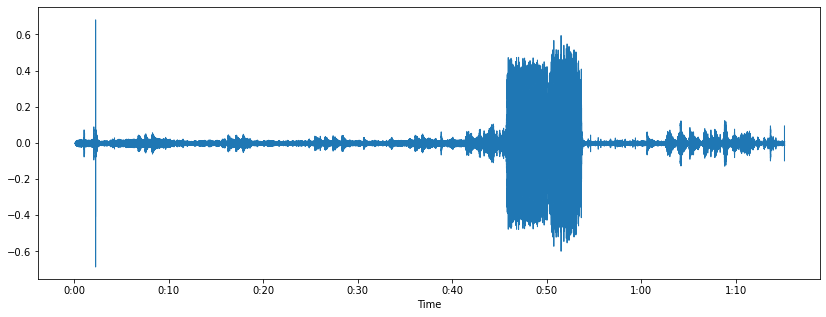

In [7]:
audio_file = "C:\\Data Science Projects\\Cooker Whistle\\wav_format\\cooker whistle 9.wav"
waveshow(audio_file)

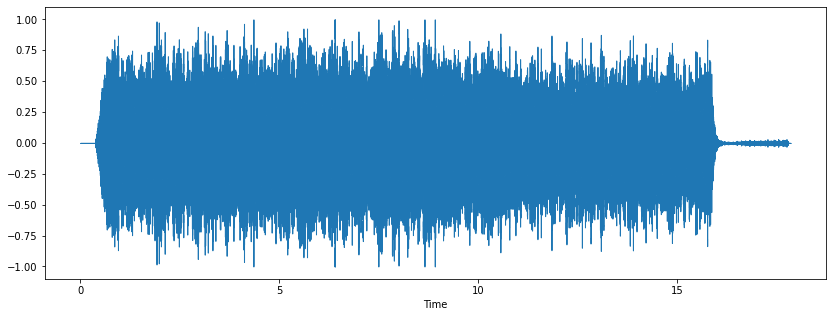

In [26]:
audio_file = "C:\\Data Science Projects\\Cooker Whistle\\wav_format\\10.wav"
waveshow(audio_file)

### Train Test split

In [40]:
X, y= load_data()
print(X.shape)
print(y.shape)

(193, 120, 120)
(193,)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=y_test.shape[0], random_state=10)

x_train = x_train.reshape((x_train.shape[0],120, 120, 1))
x_test = x_test.reshape((x_test.shape[0],120, 120, 1))
x_val = x_val.reshape((x_val.shape[0],120, 120, 1))

#y_train = to_categorical(y_train)
#y_val = to_categorical(y_val)
#y_test = to_categorical(y_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(135, 120, 120, 1)
(29, 120, 120, 1)
(29, 120, 120, 1)
(135,)
(29,)
(29,)


### Build Network

In [32]:
reg=None
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(120,120,1), kernel_regularizer=reg, name='inp'))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=reg))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.2))


model.add(layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=reg))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.2))


model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu', kernel_regularizer=reg))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid', name='out'))
#model.summary()

### Parameters

In [33]:
opt_fn = tf.keras.optimizers.Adam(learning_rate=0.00005)
metric_fn = 'accuracy'
loss_fn = 'binary_crossentropy'
reg = regularizers.l2(0.01)

### Run Model

In [34]:
model.compile(loss=loss_fn, metrics=metric_fn, optimizer=opt_fn)
hist = model.fit(x_train, y_train,
          epochs=70,
          verbose=0,
          validation_data=(x_val, y_val))

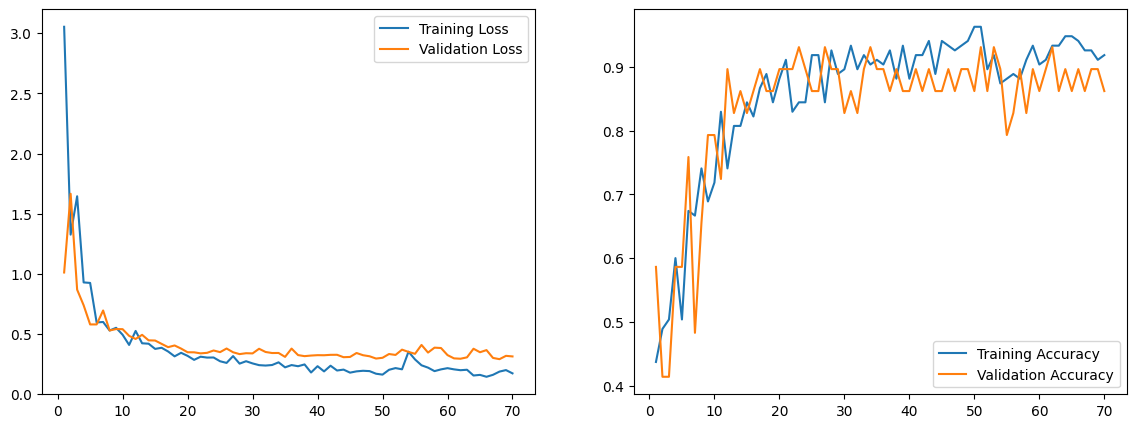

In [35]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_list=range(1, len(acc)+1)

fig, ax = plt.subplots(1,2, figsize=(14, 5), squeeze=False)
axli = ax.flatten()
sns.lineplot(x=epochs_list, y=loss, ax=axli[0], legend='brief', label="Training Loss")
sns.lineplot(x=epochs_list, y=val_loss, ax=axli[0], legend='brief', label="Validation Loss")
#axli.title("Loss")

sns.lineplot(x=epochs_list, y=acc, ax=axli[1], legend='brief', label="Training Accuracy")
sns.lineplot(x=epochs_list, y=val_acc, ax=axli[1], legend='brief', label="Validation Accuracy")
#axli.title("Accuracy")

plt.show()



In [141]:
preds = model.predict(x_test)
preds

array([[3.2967567e-03],
       [1.0367903e-02],
       [2.3139799e-03],
       [2.2332989e-04],
       [7.7575213e-01],
       [1.5234679e-02],
       [1.5892348e-03],
       [6.0653677e-03],
       [9.2992240e-01],
       [6.9970226e-01],
       [8.3410764e-01],
       [1.0442833e-01],
       [9.5584536e-01],
       [8.5027826e-01],
       [8.9041531e-01],
       [3.5343034e-04],
       [1.5752962e-02],
       [7.5483394e-01],
       [6.9331336e-01],
       [5.6842154e-01],
       [8.4376568e-01],
       [1.9541714e-01],
       [1.6161959e-03],
       [8.6530244e-01],
       [8.8354337e-01],
       [3.5846967e-02],
       [9.7975916e-01],
       [8.5027826e-01],
       [4.9393782e-01]], dtype=float32)

In [142]:
preds = np.where(preds>0.5,1,0)
preds

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0]])

In [40]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

1/1 [==============================] - 0s 87ms/step - loss: 0.2904 - accuracy: 0.8966
0.8965517282485962


In [41]:
model.save("whistle_v1.h5")

### Signatures

In [246]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Print the signatures from the converted model
interpreter = tf.lite.Interpreter(model_content=tflite_model)

signatures = interpreter.get_signature_list()
print(signatures)

INFO:tensorflow:Assets written to: C:\Users\shash\AppData\Local\Temp\tmpyh0cpxcx\assets


INFO:tensorflow:Assets written to: C:\Users\shash\AppData\Local\Temp\tmpyh0cpxcx\assets


{}


In [248]:
keras_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(2, input_dim=4, activation='relu', name='x'),
        tf.keras.layers.Dense(1, activation='relu', name='output'),
    ]
)

# Convert the keras model using TFLiteConverter.
# Keras model converter API uses the default signature automatically.
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

# Print the signatures from the converted model
interpreter = tf.lite.Interpreter(model_content=tflite_model)

signatures = interpreter.get_signature_list()
print(signatures)

INFO:tensorflow:Assets written to: C:\Users\shash\AppData\Local\Temp\tmpc2rcecxx\assets


INFO:tensorflow:Assets written to: C:\Users\shash\AppData\Local\Temp\tmpc2rcecxx\assets


{}


In [42]:
tf.keras.models.save_model(model,"ck.h5")

In [43]:
os.chdir("C:\\Data Science Projects\\Cooker Whistle\\")
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\shash\AppData\Local\Temp\tmpwbeakwv2\assets


In [44]:
open('whistle_v2.tflite', 'wb').write(tfmodel)

1613948

In [45]:
os.getcwd()

'C:\\Data Science Projects\\Cooker Whistle\\wav_format\\two_sec_window\\Out_1'

### Get Predictions from Tflite

In [9]:
os.chdir("C:\\Data Science Projects\\Cooker Whistle\\")

In [168]:
tf.keras.models.save_model(model, "whistle_save")
converter = tf.lite.TFLiteConverter.from_saved_model("whistle_save")
tflite_model = converter.convert()
open("whistle_v3.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: whistle_save\assets


INFO:tensorflow:Assets written to: whistle_save\assets


1613756

In [10]:
interpreter = tf.lite.Interpreter(model_path="whistle_v3.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 24,
  'shape': array([1, 1]),
  'shape_signature': array([-1,  1]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [11]:
preds_lite = []
for i in range(x_test.shape[0]):
    input_shape = input_details[0]['shape']
    input_tensor= np.array(np.expand_dims(x_test[i],0))
    #set the tensor to point to the input data to be inferred
    input_index = interpreter.get_input_details()[0]["index"]
    interpreter.set_tensor(input_index, input_tensor)
    #Run the inference
    interpreter.invoke()
    output_details = interpreter.get_output_details()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    #print(output_data)
    if output_data>=0.5:
        preds_lite.append(1)
    else:
        preds_lite.append(0)

In [15]:
loaded_model = tf.keras.models.load_model("whistle_v2.h5")
loaded_model.evaluate(x_test, y_test)

In [19]:
preds = loaded_model.predict(x_test)
preds = np.where(preds>0.5,1,0)
accuracy_score(preds_lite, preds)

1.0

In [45]:
model = loaded_model

### Run Live

In [1]:
import librosa
import numpy as np
import os
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv
import time
import tensorflow as tf
from PIL import Image
import win32api
import random
os.chdir("C:\\Data Science Projects\\Cooker Whistle")
model = tf.keras.models.load_model("whistle_v2.h5")

def spectro_convert(audiofile, offset=None, duration=None):
    samples, sample_rate = librosa.load(audiofile, sr=None, offset = offset, duration=duration)
    sgram = librosa.stft(samples)
    sgram_mag, _ = librosa.magphase(sgram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    return(mel_sgram)


def count_whistles(stop=2, run_time=180, whistle_time=7, prob=0.5):
    freq = int(14400)
    total_duration = run_time
    rec_file = "recording0.wav"
    cnt = 0
    duration = 2.5
    flag = False
    st = time.time()
    t_whistle = 0
    for i in range(int(total_duration/2.5)):
        recording = sd.rec(int(duration * freq), samplerate=freq, channels=1)
        sd.wait()
        write(rec_file, freq, recording)
        mel_sgram = spectro_convert(rec_file, offset=0.5, duration=2)
        mel_sgram = np.array(mel_sgram)
        img = Image.fromarray(mel_sgram)
        img = img.resize(size=(120, 120))
        img = np.asarray(img)
        img = img.reshape((1,120,120,1))
        res = model.predict(img)
        if((res>prob) & (flag==False)):
            cnt = cnt + 1
            flag = True
            t_whistle = time.time()
        print(res)
        if(cnt>=stop):
            break
        if(time.time() - t_whistle > 7):
            flag = False
    et = time.time()
    print("Time Taken: ", et-st)
    print("Whistle Count: ", cnt)

In [2]:
count_whistles(stop = 3, run_time=600, whistle_time=7, prob=0.25)
win32api.Beep(500, 1000)

[[0.59100115]]
[[0.00960951]]
[[0.01076293]]
[[0.0238138]]
[[0.02946853]]
[[0.57676536]]
[[0.03006821]]
[[0.00742422]]
[[0.01635761]]
[[0.02699609]]
[[0.02235978]]
[[0.52133036]]
Time Taken:  52.630191802978516
Whistle Count:  3
